In [1]:
import sqlite3
import pandas as pd
db_url = '/Users/huajiezhang/test/news_scrape/news-collection.db'

db = sqlite3.connect(db_url)
df = pd.read_sql_query("SELECT * FROM news", db)

In [4]:
df = df.sort_index().head(200)

In [ ]:
df.sample(4)

In [38]:
import string

In [87]:
puncs = string.punctuation
# puncs = [''.join(i) for i in puncs if not i == '-']

In [88]:
from nltk.corpus import stopwords
sw = set(stopwords.words('english')).union(set(puncs))
sw

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

### clearn data here

In [173]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
lemm.lemmatize("that'll")

"that'll"

In [172]:
from nltk.stem import SnowballStemmer
st = SnowballStemmer('english')
st.stem("that'll")

"that'll"

In [158]:
text

'apropos of canada weekly cannabis stock news: why hexo\'s new share issue got the investor stink eye 3 stocks to help you build retirement wealth 3 things that can go right for disney stock in 2020 teens are vaping pot more than ever before better buy: amazon.com vs. microsoft 3 reasons amazon won the holidays 5 bold predictions for the 2020 stock market 3 social security mistakes that happen all the time stop dreaming: cannabis banking reform isn\'t happening in 2020 why your 2020 resolution should be to buy more fintech stocks here\'s my top stock to buy and hold through the 2020s 3 high-growth stocks that are just getting started why carter’s is still a buy after surpassing analysts’ price targets 3 ways to lower your medicare premiums 3 dividend stocks to buy for 2020 good news for universal display in 2020 how many vehicles will tesla deliver in q4? my 3 top large-cap stocks to own heading into 2020 boeing veers off course in crucial starliner launch here’s how much money warren 

In [178]:
text = [lemm.lemmatize(i.lower()) for i in df['news_title']]
# text = [st.stem(i) for i in text]
text = ' '.join(text)
text = text.replace('\'','')
text

'apropos of canada weekly cannabis stock news: why hexos new share issue got the investor stink eye 3 stocks to help you build retirement wealth 3 things that can go right for disney stock in 2020 teens are vaping pot more than ever before better buy: amazon.com vs. microsoft 3 reasons amazon won the holidays 5 bold predictions for the 2020 stock market 3 social security mistakes that happen all the time stop dreaming: cannabis banking reform isnt happening in 2020 why your 2020 resolution should be to buy more fintech stocks heres my top stock to buy and hold through the 2020s 3 high-growth stocks that are just getting started why carter’s is still a buy after surpassing analysts’ price targets 3 ways to lower your medicare premiums 3 dividend stocks to buy for 2020 good news for universal display in 2020 how many vehicles will tesla deliver in q4? my 3 top large-cap stocks to own heading into 2020 boeing veers off course in crucial starliner launch here’s how much money warren buffet

In [179]:
raw_text = nltk.Text(nltk.word_tokenize(text))
raw_text.concordance("s")

Displaying 25 of 39 matches:
 are just getting started why carter ’ s is still a buy after surpassing analys
rse in crucial starliner launch here ’ s how much money warren buffett has made
he yen for dollar , euro insight dow , s & p finish record-filled week with gai
 nears purchase of as roma soccer club s & p 500 may rise to 3,500 by june , kr
t countries to retire in : rpt india ’ s rightward lurch is self-defeating is t
nds of 2019 alphabet , warren buffet ’ s berkshire hathaway among barron ’ s 20
 ’ s berkshire hathaway among barron ’ s 2020 stock picks how to maximize your 
mp retweet of alleged whistle-blower ’ s name is back on twitter major indexes 
ould soar in 2020 the margin : obama ’ s favorite movies of 2019 : ‘ little wom
naps 11-session win streak but dow and s & p 500 end at records to wrap up chri
lead declines , down 1 % , worst among s & p 500s 11 sectors santa claus rally 
day u.s. stocks dip at start of 2019 ’ s penultimate trading session here ’ s t
’ s penulti

### inspect some instances

In [149]:
terms = ['south china morning post','hong kong','new york times']
top_bigrams = bi_freq.most_common(20)
top_bg = [' '.join(i[0]) for i in top_bigrams]

In [180]:
for i in terms:
    text = re.sub(i, i.replace(' ', ''), text)

In [181]:
for i in top_bg:
    text = re.sub(i, i.replace(' ', ''), text)

In [206]:
wd_token = nltk.word_tokenize(text)
wd_token = [i for i in wd_token if i.isalpha()]

In [207]:
wd_token

['apropos',
 'of',
 'canada',
 'weekly',
 'cannabis',
 'stock',
 'news',
 'why',
 'hexos',
 'new',
 'share',
 'issue',
 'got',
 'the',
 'investor',
 'stink',
 'eye',
 'stocks',
 'to',
 'help',
 'you',
 'build',
 'retirement',
 'wealth',
 'things',
 'that',
 'can',
 'go',
 'right',
 'for',
 'disney',
 'stock',
 'in',
 'teens',
 'are',
 'vaping',
 'pot',
 'more',
 'than',
 'ever',
 'before',
 'better',
 'buy',
 'microsoft',
 'reasons',
 'amazon',
 'won',
 'the',
 'holidays',
 'bold',
 'predictions',
 'for',
 'the',
 'stockmarket',
 'socialsecurity',
 'mistakes',
 'that',
 'happen',
 'all',
 'the',
 'time',
 'stop',
 'dreaming',
 'cannabis',
 'banking',
 'reform',
 'isnt',
 'happening',
 'in',
 'why',
 'your',
 'resolution',
 'should',
 'be',
 'to',
 'buy',
 'more',
 'fintech',
 'stocks',
 'heres',
 'my',
 'top',
 'stock',
 'to',
 'buy',
 'and',
 'hold',
 'through',
 'the',
 'stocks',
 'that',
 'are',
 'just',
 'getting',
 'started',
 'why',
 'carter',
 's',
 'is',
 'still',
 'a',
 'buy',

## more text/char to remove
- 's
- ’
- ‘

In [155]:
nltk_text = nltk.Text(wd_token)
nltk_text.concordance("'s")
# south china morning post 1
# hong kong 2
# new york times
# new york

Displaying 25 of 111 matches:
anada weekly cannabis stock news hexo 's new share issue got investor stink ey
ppening resolution buy fintech stocks 's top stock buy hold 2020s high-growth 
buffett made geico things know jd.com 's potential ipo spin-off trends dominat
ds dominate cannabis landscape beware 's stealth socialsecurity cut best biote
4 amazon `` star wars '' saves disney 's watch netflix reports earnings top hi
day shipping could add billion amazon 's top line americans taking cash homes 
ng election year bills come due china 's local governments got berkshire hatha
.8 billion financial markets vanguard 's china gambit one robo adviser 5,700 f
mbit one robo adviser 5,700 funds ant 's million users tech startup investors 
 new law combat robocalls wo n't stop 's move santa kids asking alexa bring pr
alks buy free tv service xumo 'amazon 's choice n't endorsement appears future
endorsement appears future everything 's best stories might buying trash amazo
rowitz report reveals 

In [33]:
import nltk
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# wd_token = nltk.word_tokenize(text)
bgs = nltk.bigrams(wd_token)
bi_freq = nltk.FreqDist(bgs)
bi_freq

FreqDist({('hong', 'kong'): 92, ('south', 'china'): 28, ('china', 'morning'): 28, ('morning', 'post'): 28, ('new', 'york'): 23, ('york', 'times'): 16, ('post', 'hong'): 13, ('credit', 'card'): 13, ("'s", 'stock'): 12, ('stock', 'market'): 11, ...})

In [211]:
w = [st.stem(i) for i in wd_token]
w = [i for i in w if i not in set(stopwords.words('english'))]

In [212]:
uni_freq = nltk.FreqDist(w)
uni_freq

FreqDist({'stock': 100, 'hongkong': 68, 'year': 39, 'say': 35, 'buy': 32, 'china': 32, 'top': 28, 'protest': 26, 'market': 25, 'whi': 24, ...})

In [219]:
import json

with open('data.json', 'w') as fp:
    json.dump(dout, fp)

In [220]:
with open('data.json') as f:
    data = json.load(f)
data

{'stock': 100,
 'hongkong': 68,
 'year': 39,
 'say': 35,
 'buy': 32,
 'china': 32,
 'top': 28,
 'protest': 26,
 'market': 25,
 'whi': 24,
 'get': 24,
 'price': 24,
 'new': 23,
 'share': 23,
 'week': 22,
 'investor': 21,
 'best': 21,
 'trade': 21,
 'iran': 21,
 'creditcard': 21,
 'could': 19,
 'trump': 19,
 'tesla': 18,
 'appl': 18,
 'oil': 18,
 'kill': 18,
 'report': 17,
 'may': 16,
 'southchinamorningpost': 16,
 'newyorktim': 16,
 'record': 15,
 'hit': 15,
 'earn': 14,
 'tech': 14,
 'compani': 14,
 'back': 14,
 'day': 14,
 'retir': 13,
 'financi': 13,
 'forecast': 13,
 'fed': 13,
 'bloomberg': 13,
 'amazon': 12,
 'chang': 12,
 'home': 12,
 'dow': 12,
 'rise': 12,
 'end': 12,
 'show': 12,
 'credit': 12,
 'data': 12,
 'make': 12,
 'southchinamorningposthongkong': 12,
 'news': 11,
 'thing': 11,
 'go': 11,
 'stockmarket': 11,
 'time': 11,
 'money': 11,
 'ipo': 11,
 'big': 11,
 'futur': 11,
 'take': 11,
 'next': 11,
 'tension': 11,
 'way': 10,
 'dividend': 10,
 'know': 10,
 'gold': 10,
 'h

In [218]:
dout = {i[0]:i[1] for i in uni_freq.most_common(80)}
dout

{'stock': 100,
 'hongkong': 68,
 'year': 39,
 'say': 35,
 'buy': 32,
 'china': 32,
 'top': 28,
 'protest': 26,
 'market': 25,
 'whi': 24,
 'get': 24,
 'price': 24,
 'new': 23,
 'share': 23,
 'week': 22,
 'investor': 21,
 'best': 21,
 'trade': 21,
 'iran': 21,
 'creditcard': 21,
 'could': 19,
 'trump': 19,
 'tesla': 18,
 'appl': 18,
 'oil': 18,
 'kill': 18,
 'report': 17,
 'may': 16,
 'southchinamorningpost': 16,
 'newyorktim': 16,
 'record': 15,
 'hit': 15,
 'earn': 14,
 'tech': 14,
 'compani': 14,
 'back': 14,
 'day': 14,
 'retir': 13,
 'financi': 13,
 'forecast': 13,
 'fed': 13,
 'bloomberg': 13,
 'amazon': 12,
 'chang': 12,
 'home': 12,
 'dow': 12,
 'rise': 12,
 'end': 12,
 'show': 12,
 'credit': 12,
 'data': 12,
 'make': 12,
 'southchinamorningposthongkong': 12,
 'news': 11,
 'thing': 11,
 'go': 11,
 'stockmarket': 11,
 'time': 11,
 'money': 11,
 'ipo': 11,
 'big': 11,
 'futur': 11,
 'take': 11,
 'next': 11,
 'tension': 11,
 'way': 10,
 'dividend': 10,
 'know': 10,
 'gold': 10,
 'h

In [213]:
def nltk_freq_to_df(nltk_freq):
    d = {' '.join(k):[nltk_freq.get(k)] for k in nltk_freq}
    wd_df = pd.DataFrame.from_dict(d).transpose()
    wd_df = wd_df.reset_index()
    wd_df.columns = ['words', 'freq']
    wd_df = wd_df.sort_values(by='freq',ascending=False)
    
    return wd_df

u_df = nltk_freq_to_df(uni_freq)

In [214]:
# f_df = wd_df.loc[wd_df['freq'] >=6]
u_dfn = u_df.loc[u_df['freq'] >=10]
u_dfn

,words,freq
4,s t o c k,100
1131,h o n g k o n g,68
202,y e a r,39
488,s a y,35
233,c h i n a,32
...,...,...
62,d i v i d e n d,10
58,w a y,10
243,d e b t,10
798,o i l p r i c,10


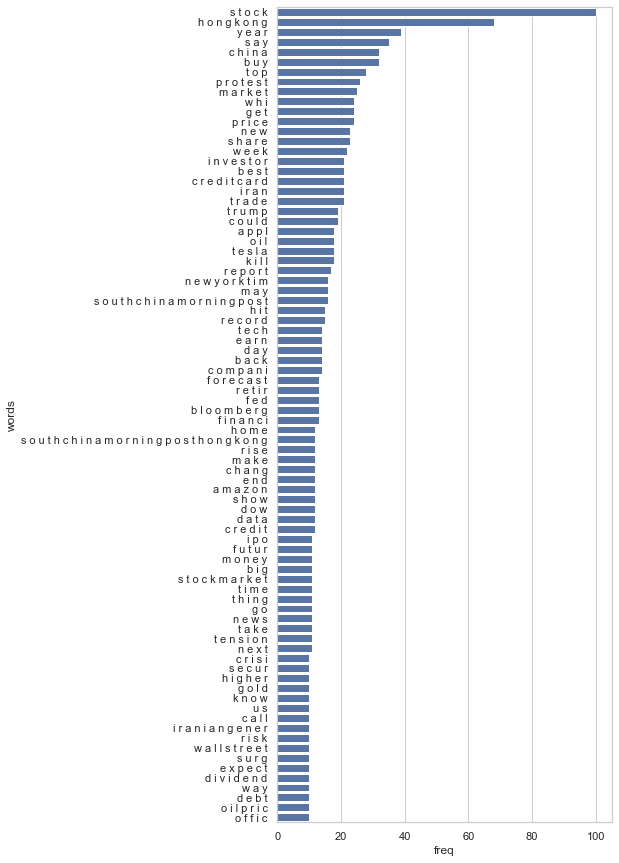

In [215]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x='freq', y='words', data=u_dfn, color='b')

In [102]:
d = {' '.join(k):[bi_freq.get(k)] for k in bi_freq}
wd_df = pd.DataFrame.from_dict(d).transpose()
wd_df = wd_df.reset_index()
wd_df.columns = ['words', 'freq']
wd_df.sample(10)

,words,freq
4895,'s cyfrowy,1
1093,best stock,1
3837,raised outlook,1
2311,made 791,1
1613,much acelrx,1
454,advertising holidays,1
897,economy best,1
1993,fresh intraday,1
3838,outlook tesla,1
2605,times fidelity,1


In [103]:
f_df = wd_df.loc[wd_df['freq'] >=6]
f_df = f_df.sort_values(by='freq',ascending=False)

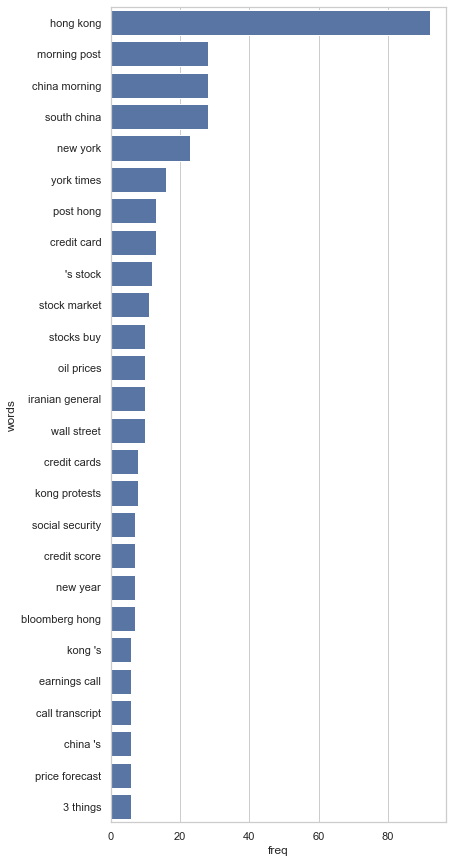

In [104]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x='freq',y='words',data=f_df, color='b')

In [30]:
f_df['freq'].describe()

count    63.000000
mean     12.587302
std      12.370145
min       6.000000
25%       7.000000
50%       8.000000
75%      13.000000
max      92.000000
Name: freq, dtype: float64

In [3]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
round1 = lambda x: clean_text_round1(x)

In [4]:
text1 = round1(text)
text1

'apropos of canada weekly cannabis stock news why hexos new share issue got the investor stink eye  stocks to help you build retirement wealth  things that can go right for disney stock in  teens are vaping pot more than ever before better buy amazoncom vs microsoft  reasons amazon won the holidays  bold predictions for the  stock market  social security mistakes that happen all the time stop dreaming cannabis banking reform isnt happening in  why your  resolution should be to buy more fintech stocks heres my top stock to buy and hold through the   highgrowth stocks that are just getting started why carter’s is still a buy after surpassing analysts’ price targets  ways to lower your medicare premiums  dividend stocks to buy for  good news for universal display in  how many vehicles will tesla deliver in  my  top largecap stocks to own heading into  boeing veers off course in crucial starliner launch here’s how much money warren buffett has made in geico  things to know about jdcoms pot

In [5]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [6]:
text2 = round2(text1)

In [7]:
import nltk

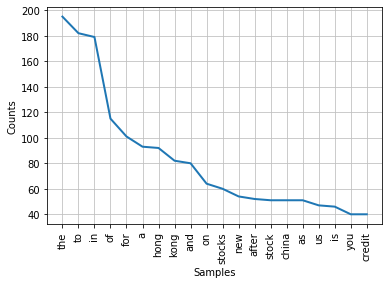

In [8]:
token = nltk.word_tokenize(text2)
nltk_text = nltk.Text(token)
# nltk_text
nltk.FreqDist(nltk_text).plot(20)

In [ ]:
d = {k:v for k,v in nltk.FreqDist(noun).items() if v >= 2}
d

In [12]:
import json
json.dumps()

TypeError: dumps() missing 1 required positional argument: 'obj'

FreqDist({'stocks': 19, 'are': 15, 'buy': 11, 'is': 11, 'year': 11, 'stock': 9, 'tech': 8, 'heres': 7, 'earnings': 7, 'says': 7, ...})

In [11]:
nltk.FreqDist(noun)

FreqDist({'stocks': 60, 'hong': 55, 'kong': 55, 'stock': 51, 'is': 46, 'credit': 40, 'are': 37, 'year': 35, 'post': 31, 'morning': 30, ...})

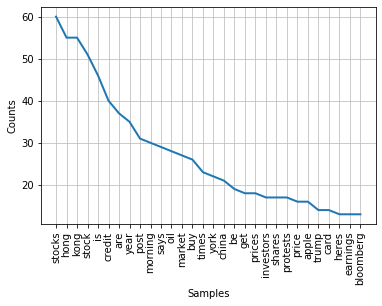

In [10]:
noun = nltk.FreqDist(i[0] for i in nltk.pos_tag(nltk_text) if i[1][:2] in ['NN', 'VB'])
nltk.FreqDist(noun).plot(30)

In [38]:
nltk.pos_tag(nltk_text)

[('apropos', 'NN'),
 ('of', 'IN'),
 ('canada', 'JJ'),
 ('weekly', 'JJ'),
 ('cannabis', 'NN'),
 ('stock', 'NN'),
 ('news', 'NN'),
 ('why', 'WRB'),
 ('hexos', 'NN'),
 ('new', 'JJ'),
 ('share', 'NN'),
 ('issue', 'NN'),
 ('got', 'VBD'),
 ('the', 'DT'),
 ('investor', 'NN'),
 ('stink', 'VBP'),
 ('eye', 'NN'),
 ('stocks', 'NNS'),
 ('to', 'TO'),
 ('help', 'VB'),
 ('you', 'PRP'),
 ('build', 'VB'),
 ('retirement', 'NN'),
 ('wealth', 'NN'),
 ('things', 'NNS'),
 ('that', 'WDT'),
 ('can', 'MD'),
 ('go', 'VB'),
 ('right', 'RB'),
 ('for', 'IN'),
 ('disney', 'NN'),
 ('stock', 'NN'),
 ('in', 'IN'),
 ('teens', 'NNS'),
 ('are', 'VBP'),
 ('vaping', 'VBG'),
 ('pot', 'NN'),
 ('more', 'RBR'),
 ('than', 'IN'),
 ('ever', 'RB'),
 ('before', 'IN'),
 ('better', 'JJR'),
 ('buy', 'NN'),
 ('amazoncom', 'IN'),
 ('vs', 'NN'),
 ('microsoft', 'JJ'),
 ('reasons', 'NNS'),
 ('amazon', 'VBP'),
 ('won', 'VBD'),
 ('the', 'DT'),
 ('holidays', 'NNS'),
 ('bold', 'VBP'),
 ('predictions', 'NNS'),
 ('for', 'IN'),
 ('the', 'DT'),
 (

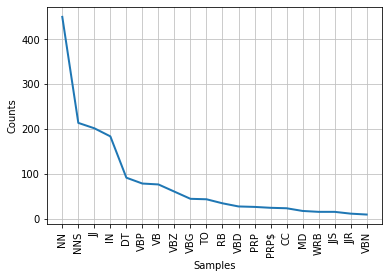

In [37]:
nltk.FreqDist(noun).plot(20)

In [ ]:
text2

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate(text2)
plt.figure(figsize=(20,10), dpi=1000)
# plt.subplot(3, 4, index+1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

# plt.title(full_names[index])

(-0.5, 399.5, 199.5, -0.5)

Error in callback <function flush_figures at 0x10ff99040> (for post_execute):


KeyboardInterrupt: 